In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from pylab import rcParams

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

# KNN

In [2]:
from sklearn.neighbors import KNeighborsClassifier

In [3]:
X_train = pd.read_pickle('X_train.pkl')
y_train = pd.read_pickle('y_train.pkl')


In [4]:
X_valid = pd.read_pickle('X_valid.pkl')
y_valid = pd.read_pickle('y_valid.pkl')

### Using File 'X_train.pkl' created in Logistic_Regression.ipynb

In [5]:
X_train

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,
299,0,29.699118,0,0,30.5000,0,0,1,1,0,0
885,0,25.000000,0,0,7.0500,0,0,1,0,0,1
248,1,24.000000,0,2,14.5000,0,0,1,0,1,0
479,0,22.000000,0,0,7.5208,0,0,1,0,0,1
306,0,0.920000,1,2,151.5500,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
107,1,21.000000,0,0,7.6500,0,0,1,0,0,1
271,0,29.699118,0,0,31.0000,0,0,1,1,0,0
861,0,41.000000,2,0,14.1083,0,0,1,0,0,1


## RobustScaler

In [6]:
from sklearn.preprocessing import RobustScaler

In [7]:
cols_for_scale = ['Age', 'SibSp', 'Parch', 'Fare']

In [8]:
scaler = RobustScaler()

In [9]:
X_train[cols_for_scale] = scaler.fit_transform(X_train[cols_for_scale])

In [10]:
X_train.describe()

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.00000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,0.342814,-0.017145,0.553892,0.372754,0.787570,0.17515,0.086826,0.738024,0.227545,0.211078,0.561377
std,0.475006,1.000766,1.185279,0.795588,2.285892,0.38038,0.281791,0.440039,0.419561,0.408379,0.496590
min,0.000000,-2.252240,0.000000,0.000000,-0.637874,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-0.592240,0.000000,0.000000,-0.286822,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,0.407760,1.000000,0.000000,0.713178,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,3.869299,8.000000,6.000000,22.056664,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


DO the same with X_valid

In [11]:
X_valid[cols_for_scale] = scaler.fit_transform(X_valid[cols_for_scale])

### Classification Using KNN

In [12]:
k_vals = np.arange(2, 10)

In [13]:
accuracy_valid = []
accuracy_train = []

for val in k_vals:
    clf = KNeighborsClassifier(n_neighbors=val)
    
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_valid)
    y_pred_train = clf.predict(X_train)
        
    acc_valid = accuracy_score(y_valid, y_pred)
    acc_train = accuracy_score(y_train, y_pred_train)
    
    
    accuracy_valid.append(acc_valid)
    accuracy_train.append(acc_train)
    
    print('n_neighbors = {} \n\tacc_valid = {} \n\tacc_train = {}\n'.format(val, acc_valid, acc_train))

n_neighbors = 2 
	acc_valid = 0.8026905829596412 
	acc_train = 0.8772455089820359

n_neighbors = 3 
	acc_valid = 0.8071748878923767 
	acc_train = 0.875748502994012

n_neighbors = 4 
	acc_valid = 0.7757847533632287 
	acc_train = 0.8458083832335329

n_neighbors = 5 
	acc_valid = 0.8071748878923767 
	acc_train = 0.8637724550898204

n_neighbors = 6 
	acc_valid = 0.8251121076233184 
	acc_train = 0.8353293413173652

n_neighbors = 7 
	acc_valid = 0.7982062780269058 
	acc_train = 0.8323353293413174

n_neighbors = 8 
	acc_valid = 0.7668161434977578 
	acc_train = 0.8173652694610778

n_neighbors = 9 
	acc_valid = 0.7847533632286996 
	acc_train = 0.8173652694610778



# Display result in graph

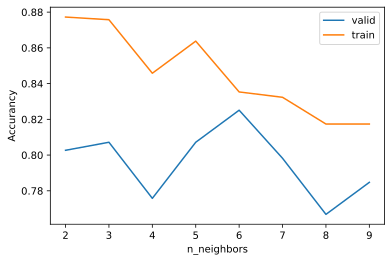

In [14]:
plt.plot(k_vals, accuracy_valid)
plt.plot(k_vals, accuracy_train)
plt.xlabel('n_neighbors')
plt.ylabel('Accurancy')
plt.legend(['valid', 'train'])


# Create model with better Accuracy


In [15]:
clf = KNeighborsClassifier(n_neighbors = 6)
clf.fit(X_train, y_train)
Y_pred = clf.predict(X_valid)

In [16]:
accuracy_score(y_valid, y_pred)

0.7847533632286996

### accuracy and completeness 

In [17]:
y_valid.value_counts(normalize=True)

0    0.600897
1    0.399103
Name: Survived, dtype: float64

In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
confusion_matrix(y_valid, y_pred)

array([[110,  24],
       [ 24,  65]])

### True Negative

In [20]:
# When y_pred == 0 and it's True

TN = ((y_valid == 0) & (y_pred == 0)).sum()
TN

110

### False Positive

In [21]:
# When y_pred == 1, but this is False

FP = ((y_valid == 0) & (y_pred == 1)).sum()
FP

24

### False Negative

In [22]:
# When y_pred == 0 and it's False

FN = ((y_valid == 1) & (y_pred == 0)).sum()
FN

24

### True Positive

In [23]:
# When y_pred == 1 and it's True

TP = ((y_valid == 1) & (y_pred == 1)).sum()
TP

65

### Normalized Confusion Matrix

In [24]:
CM = confusion_matrix(y_valid, y_pred) / y_valid.shape[0]

In [25]:
# the SUM of 4q. must be = 1

CM

array([[0.49327354, 0.10762332],
       [0.10762332, 0.29147982]])

### Precision

In [26]:
# Calculate manually

Precision = TP / (TP + FP)
Precision

0.7303370786516854

In [27]:
# Using Precision_score()

from sklearn.metrics import precision_score
precision_score(y_valid, y_pred)

0.7303370786516854

### completeness

In [28]:
Recall = TP / (TP + FN)
Recall

0.7303370786516854

In [29]:
# Using Recall_score()

from sklearn.metrics import recall_score
recall_score(y_valid, y_pred)

0.7303370786516854

## F1 Score

In [30]:
# Using Formula

F1 = 2 * (Precision * Recall) / (Precision + Recall)
F1

0.7303370786516854

In [31]:
# Using import

from sklearn.metrics import f1_score

f1_score(y_valid, y_pred)

0.7303370786516854

# Area Under Curved

## Metric AUC

In [32]:
y_pred_proba = clf.predict_proba(X_valid)

In [33]:
y_pred_proba

array([[0.66666667, 0.33333333],
       [0.83333333, 0.16666667],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.5       , 0.5       ],
       [0.        , 1.        ],
       [0.33333333, 0.66666667],
       [0.83333333, 0.16666667],
       [0.5       , 0.5       ],
       [0.16666667, 0.83333333],
       [0.66666667, 0.33333333],
       [0.83333333, 0.16666667],
       [0.83333333, 0.16666667],
       [1.        , 0.        ],
       [0.83333333, 0.16666667],
       [0.        , 1.        ],
       [0.66666667, 0.33333333],
       [0.33333333, 0.66666667],
       [1.        , 0.        ],
       [0.5       , 0.5       ],
       [0.83333333, 0.16666667],
       [0.5       , 0.5       ],
       [0.66666667, 0.33333333],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.83333333, 0.16666667],
       [0.66666667, 0.33333333],
       [0.83333333, 0.16666667],
       [0.66666667, 0.33333333],
       [0.5       , 0.5       ],
       [0.

In [34]:
y_pred_proba = y_pred_proba[:, 1]

y_pred_proba

array([0.33333333, 0.16666667, 0.        , 1.        , 0.5       ,
       1.        , 0.66666667, 0.16666667, 0.5       , 0.83333333,
       0.33333333, 0.16666667, 0.16666667, 0.        , 0.16666667,
       1.        , 0.33333333, 0.66666667, 0.        , 0.5       ,
       0.16666667, 0.5       , 0.33333333, 0.        , 0.        ,
       0.16666667, 0.33333333, 0.16666667, 0.33333333, 0.5       ,
       0.16666667, 0.66666667, 0.33333333, 0.5       , 0.        ,
       0.33333333, 0.5       , 0.66666667, 0.5       , 0.16666667,
       0.33333333, 0.16666667, 0.16666667, 0.16666667, 0.5       ,
       0.16666667, 0.16666667, 0.        , 0.16666667, 0.5       ,
       0.33333333, 0.5       , 0.        , 0.66666667, 0.        ,
       0.83333333, 0.33333333, 0.83333333, 1.        , 0.5       ,
       0.16666667, 1.        , 0.66666667, 0.5       , 0.16666667,
       0.66666667, 0.33333333, 0.16666667, 0.33333333, 1.        ,
       0.83333333, 0.83333333, 0.33333333, 1.        , 0.16666

### Build graph based on y_pred_proba

Text(0.5, 0.98, 'Graph for people who survived')

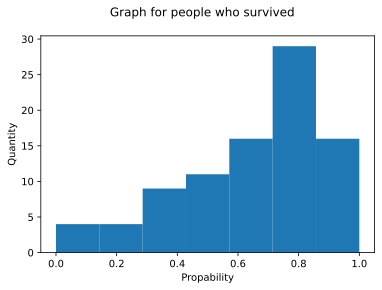

In [35]:
plt.hist(y_pred_proba[y_valid == 1], bins = 7)
plt.xlabel('Propability')
plt.ylabel('Quantity')
plt.suptitle('Graph for people who survived')

Text(0.5, 0.98, 'Graph for people who were not lucky')

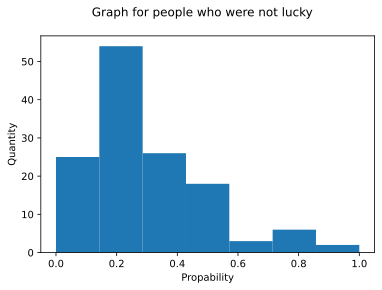

In [36]:
plt.hist(y_pred_proba[y_valid == 0], bins = 7)
plt.xlabel('Propability')
plt.ylabel('Quantity')
plt.suptitle('Graph for people who were not lucky')

### Concatinate those 2 graphs

Text(0, 0.5, 'Density')

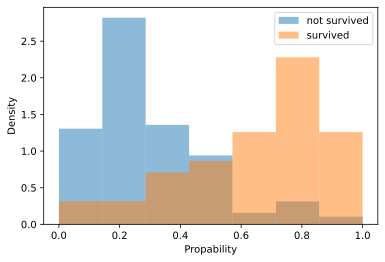

In [37]:
plt.hist(y_pred_proba[y_valid == 0], bins = 7, density = True, alpha = 0.5)
plt.hist(y_pred_proba[y_valid == 1], bins = 7, density = True, alpha = 0.5)
plt.legend(['not survived', 'survived'])
plt.xlabel('Propability')
plt.ylabel('Density')

# ROC_CURVE

In [38]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_valid, y_pred_proba, pos_label = 1)

## False Positive Rate (fall-out)

### _FPR_ = FP / N = FP / FP + TN

## True Positive Rate (recall, sensitivity, hit rate)

### _TPR_ = TP / P = TP / TP + FN

In [39]:
fpr

array([0.        , 0.01492537, 0.05970149, 0.08208955, 0.21641791,
       0.41044776, 0.81343284, 1.        ])

In [40]:
tpr

array([0.        , 0.17977528, 0.50561798, 0.68539326, 0.80898876,
       0.91011236, 0.95505618, 1.        ])

In [41]:
thresholds

array([2.        , 1.        , 0.83333333, 0.66666667, 0.5       ,
       0.33333333, 0.16666667, 0.        ])

### For FPR = 1

In [42]:
((y_valid == 0) & (y_pred == 1) & (y_pred_proba >= 1)).sum() / (y_valid == 0).sum()

0.014925373134328358

### For TPR = 1

In [43]:
((y_valid == 1) & (y_pred == 1) & (y_pred_proba >= 1)).sum() / (y_valid == 1).sum()

0.1797752808988764

### For FPR = 8.3333333333333333......

In [44]:
((y_valid == 0) & (y_pred == 1) & (y_pred_proba >= 0.83333333)).sum() / (y_valid == 0).sum()

0.05970149253731343

### For TPR = 8.3333333333333333......

In [45]:
((y_valid == 1) & (y_pred == 1) & (y_pred_proba >= 0.83333333)).sum() / (y_valid == 1).sum()

0.5056179775280899

## Create Graph Based on ROC

Text(0.5, 1.0, 'Reciver operating characteristic (ROC)')

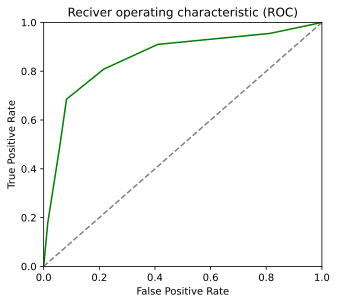

In [46]:
rcParams['figure.figsize'] = 5, 4.5
plt.plot(fpr, tpr, color = 'green', label = 'ROC curve')
plt.plot([0,1], [0,1], color = 'grey', linestyle = '--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciver operating characteristic (ROC)')


## The bigger area between green and grey the better model working

## Calculate this space using ROC_AUC_SCORE

In [47]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_valid, y_pred_proba)

0.8553580412544022